**تمرین رگرسیون خطی**

این شبیه پیاده سازی با بوستون هست فقط با یه دیتاست دیگه

---


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
work=pd.read_csv(r'/content/work.csv')
work

,Country,Country Abbreviation,Year,Average annual working hours per worker
0,Australia,AUS,1870,2792.0000
1,Belgium,BEL,1870,3483.0000
2,Canada,CAN,1870,2845.0000
3,Denmark,DNK,1870,3434.0000
4,France,FRA,1870,3168.0000
...,...,...,...,...
3465,Turkey,TUR,2017,1832.0000
3466,United Kingdom,GBR,2017,1670.2728
3467,United States,USA,2017,1757.2255
3468,Uruguay,URY,2017,1552.3470


In [ ]:
work=work.rename(columns={'Country Abbreviation':'Abbreviation','Average annual working hours per worker':'hours'})
work

,Country,Abbreviation,Year,hours
0,Australia,AUS,1870,2792.0000
1,Belgium,BEL,1870,3483.0000
2,Canada,CAN,1870,2845.0000
3,Denmark,DNK,1870,3434.0000
4,France,FRA,1870,3168.0000
...,...,...,...,...
3465,Turkey,TUR,2017,1832.0000
3466,United Kingdom,GBR,2017,1670.2728
3467,United States,USA,2017,1757.2255
3468,Uruguay,URY,2017,1552.3470


In [ ]:
work=work.drop(columns='Abbreviation')

In [ ]:
data=work.drop(columns='hours')
data

,Country,Year
0,Australia,1870
1,Belgium,1870
2,Canada,1870
3,Denmark,1870
4,France,1870
...,...,...
3465,Turkey,2017
3466,United Kingdom,2017
3467,United States,2017
3468,Uruguay,2017


In [ ]:
target=work[['hours']]
target

,hours
0,2792.0000
1,3483.0000
2,2845.0000
3,3434.0000
4,3168.0000
...,...
3465,1832.0000
3466,1670.2728
3467,1757.2255
3468,1552.3470


In [ ]:
data=pd.get_dummies(data)
data

,Year,Country_Argentina,Country_Australia,Country_Austria,Country_Bangladesh,Country_Barbados,Country_Belgium,Country_Brazil,Country_Bulgaria,Country_Cambodia,...,Country_Switzerland,Country_Taiwan,Country_Thailand,Country_Trinidad and Tobago,Country_Turkey,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Venezuela,Country_Vietnam
0,1870,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1870,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1870,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1870,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1870,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,2017,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3466,2017,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3467,2017,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3468,2017,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


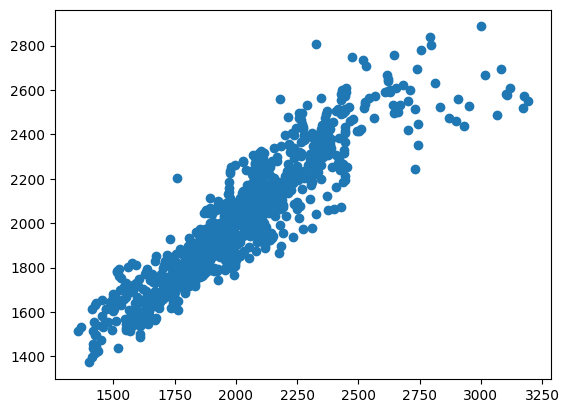

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
MSE=mse(y_test,y_pred)
MSE

14349.203522253763

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(reg,data,target,cv=4)
cv_score

array([-2.32060706e-02,  7.69777415e-01, -2.33153570e+18,  6.31334063e-01])

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(data,target)
lasso_coef=lasso.coef_
lasso_coef

array([  -8.35610504, -108.14240414, -136.6586666 , -158.46730718,
        193.59761323, -185.8115403 , -226.30812186,  -68.60765222,
       -164.54300741,  479.68347259, -127.21089122,  313.79022787,
         99.65879953,   58.9495407 ,  437.71454759,   59.10455448,
         12.27238837,  -17.37113245, -338.92933016,  -13.79707932,
         84.0661627 , -166.13807811, -210.99748017, -224.42442148,
        104.75189449,  407.97560206,   78.96030114, -229.14634747,
        134.33853363,   27.15810407,   59.64389991,   49.06320731,
        -81.82594806,    0.        ,  -31.3170011 ,   85.49544106,
         -0.        , -312.53421503,  335.23398158,  287.80028982,
        298.07992165,  494.92871427, -341.91956864, -111.20677622,
         58.73260216, -351.00748856,  217.28025651,  -13.53208452,
        179.50883868,  206.16656647,   11.89534009,    0.        ,
        102.13511227,    0.        ,  315.38738186,  -55.66965193,
       -129.631418  ,  445.84063342,  516.61490866, -124.23606

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(data,target)
ridge_coef=ridge.coef_
ridge_coef

array([[  -8.41729177, -143.63146307, -172.11465258, -193.8842384 ,
         170.48377011, -244.96504298, -261.64722515, -104.15902401,
        -207.95101219,  462.42709128, -162.68429306,  287.96618659,
          76.7354437 ,   33.39800829,  418.08565294,   44.76755924,
          -1.86214638,  -60.30100434, -374.12520917,  -57.86354465,
          69.61906141, -201.55351594, -246.36601077, -259.77599213,
          79.23177974,  382.99170382,   58.24369069, -265.26610364,
         111.33367239,    4.3754936 ,   33.15039003,   28.69653418,
        -117.37345018,  -17.41749725,  -66.9391268 ,   71.03236444,
         -34.67705115, -349.04281617,  311.80636886,  271.85267638,
         272.16246791,  471.16741876, -377.12557269, -148.13766856,
          72.41570043, -386.16566425,  194.09323165,  -49.1872061 ,
         156.39895514,  189.97679247,  -13.6079036 ,  -23.87070916,
          85.80964712,  -25.56904462,  290.54793446,  -97.11944442,
        -173.21635418,  434.62802914,  490.66151